In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print('iris_dataset의 키:\n', iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print('타깃의 이름: \n', iris_dataset['target_names'])

타깃의 이름: 
 ['setosa' 'versicolor' 'virginica']


In [5]:
print('특징의 이름: \n', iris_dataset['feature_names'])

특징의 이름: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print('data의 타입: ', type(iris_dataset['data']))

data의 타입:  <class 'numpy.ndarray'>


In [7]:
print('data의 크기: ', iris_dataset['data'].shape)

data의 크기:  (150, 4)


In [8]:
print('data의 처음 다섯개: \n', iris_dataset['data'][:5])

data의 처음 다섯개: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print('target의 타입: ', type(iris_dataset['target']))

target의 타입:  <class 'numpy.ndarray'>


In [10]:
print('target의 크기: ', iris_dataset['target'].shape)

target의 크기:  (150,)


In [11]:
print('target: \n', iris_dataset['target']) # 0: 'setosa', 1: 'versicolor', 2: 'virginica'

target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# 데이터의 준비 - 학습자료와 테스트 자료 분리
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.3)

In [14]:
print('X_train의 크기: ', X_train.shape)
print('y_train의 크기: ', y_train.shape)

X_train의 크기:  (105, 4)
y_train의 크기:  (105,)


In [15]:
print('X_test의 크기: ', X_test.shape)
print('y_test의 크기: ', y_test.shape)

X_test의 크기:  (45, 4)
y_test의 크기:  (45,)


In [16]:
# 데이터의 시각화
import pandas as pd
import matplotlib as plt
import sklearn

In [17]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='p

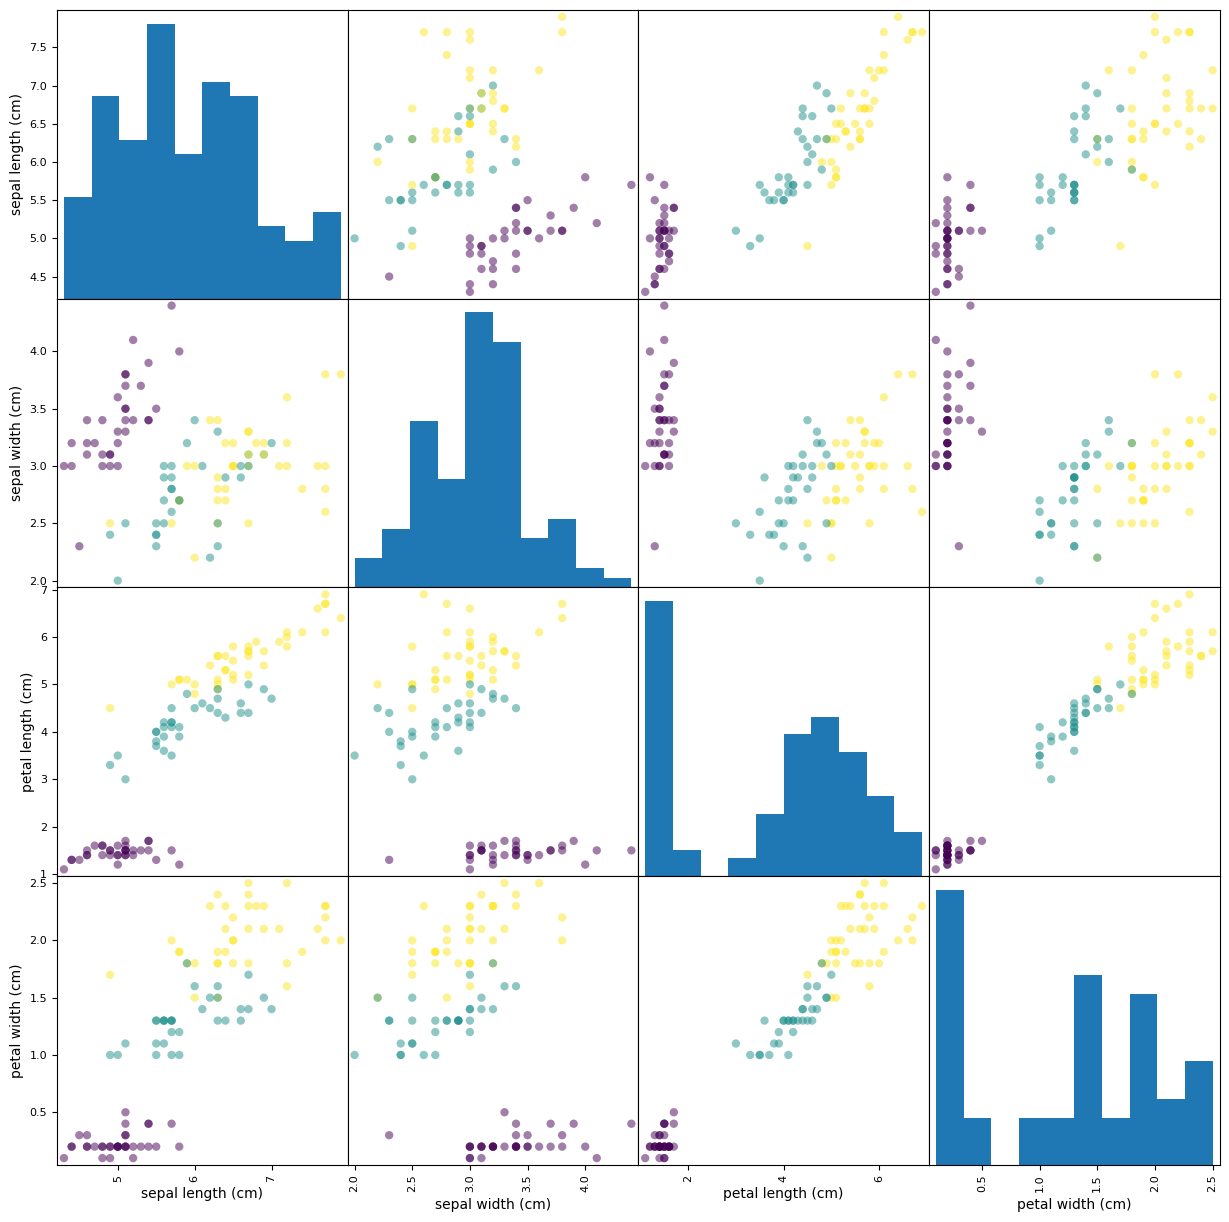

In [18]:
pd.plotting.scatter_matrix(iris_dataframe,
                            figsize=(15,15),
                            c=y_train,
                            marker='o',
                            cmap='viridis')

In [19]:
# 첫 번째 머신 러닝 모델: k-최근접 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# 예측하기
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])  # 예측용 샘플 데이터
X_new

array([[5. , 2.9, 1. , 0.2]])

In [22]:
prediction = knn.predict(X_new)
print('예측: ', prediction)
print('예측한 타깃의 이름: ', iris_dataset['target_names'][prediction])

예측:  [0]
예측한 타깃의 이름:  ['setosa']


In [23]:
# 모델의 평가
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값: \n', y_pred)

테스트 세트에 대한 예측값: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [24]:
print('테스트 세트에 대한 정확도: \n', np.mean(y_pred == y_test)*100)
# 97.8% 정도 일치

테스트 세트에 대한 정확도: 
 97.77777777777777


In [25]:
print('테스트 세트에 대한 정확도: \n', knn.score(X_test, y_test))

테스트 세트에 대한 정확도: 
 0.9777777777777777
